<a href="https://colab.research.google.com/github/meghana2343/ADS-Project/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
dataset = pd.read_csv('C://Users/Sulthan/Downloads/HistoricalData_1761495123702.csv')
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/C://Users/Sulthan/Downloads/HistoricalData_1761495123702.csv'

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Once the file is uploaded, you can read it using pandas like this. Make sure to replace `'HistoricalData_1761495123702.csv'` with the exact name of the file you uploaded if it's different.

In [ ]:
import pandas as pd

dataset = pd.read_csv('dataset.txt')
display(dataset.head())

In [ ]:
dataset.shape


In [ ]:
#preprocessing data


In [ ]:
dataset.isna().sum()

In [ ]:
dataset.info()

In [ ]:
#converting the 'Date' column into 'datetime' dtype
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:

dataset.info()

In [ ]:
#making the 'Date ' col as index
dataset.set_index('Date',inplace=True)

In [ ]:
dataset.info()

In [ ]:
dataset.head()

In [ ]:
#sorting the indexes
dataset.sort_index(inplace=True)

In [ ]:
# Remove $ and convert selected columns to numeric
cols = ['Close/Last', 'Open', 'High', 'Low']
for col in cols:
    dataset[col] = dataset[col].replace({r'\$': ''}, regex=True).astype(float)

In [ ]:
dataset.info()

In [ ]:
#data normalization
scaler=MinMaxScaler()
scaler_values=scaler.fit_transform(dataset)
dataset[dataset.columns] = scaler_values




In [ ]:
scaler_values

In [ ]:
dataset_scaled=pd.DataFrame(scaler_values,columns=dataset.columns, index=dataset.index)

In [ ]:
dataset_scaled.head()

In [ ]:
#plotting columns
plt.rcParams['figure.figsize']=(15,5)
figure,ax=plt.subplots(5)

for ax,col in zip(ax, dataset_scaled.columns):
    ax.plot(dataset_scaled[col])
    ax.set_title(col)
    ax.axes.get_xaxis().set_visible(False)





In [ ]:
## creating the sliding window sequence

def create_sequences(data,window_size):
    x = []
    y = []
    for i in range(window_size, len(data)):
        x.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(x),np.array(y)

In [ ]:
window_size=50
x, y = create_sequences(dataset_scaled, 30)

In [ ]:
x.shape, y.shape

In [ ]:
x

In [ ]:
y

In [ ]:
#train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape,


In [ ]:
x_train.shape[1], x_train.shape[1]

In [ ]:
## lstm models
model= keras.Sequential([
    #adding firsr  lstm layers
    keras.layers.LSTM(units=52, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    keras.layers.Dropout(0.3),
    #adding second lstm layers
    keras.layers.LSTM(units=52, return_sequences=True),
    keras.layers.Dropout(0.3),
    #adding third lstm layers
    keras.layers.LSTM(units=52, return_sequences=False),
    keras.layers.Dropout(0.3),
    #adding output layers
    keras.layers.Dense(y_train.shape[1])



])

In [ ]:
#compilation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])

In [ ]:
#early stopping condition
early_stopping=EarlyStopping(monitor='val_loss',
                             patience=30,
                             restore_best_weights=True)


In [ ]:
prediction = model.fit(x_train, y_train, epochs=100, batch_size=3, validation_split=0.3, callbacks=[early_stopping])

In [ ]:
predictions=model.predict(x_test)

In [ ]:
prediction.history

In [ ]:
##forecasting the data

predictions[:10]



In [ ]:
###inverse scaling


predictions_inverse = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [ ]:
predictions[:10]

array([[0.7212145 , 0.19780093, 0.7440205 , 0.7507418 , 0.7565812 ],
       [0.72323436, 0.22664395, 0.7398385 , 0.7520477 , 0.75834894],
       [0.7154039 , 0.26048607, 0.7345823 , 0.7478344 , 0.7468765 ],
       [0.66873705, 0.18005675, 0.6861308 , 0.69420946, 0.7042624 ],
       [0.85610163, 0.24699403, 0.8996839 , 0.89066714, 0.89467454],
       [0.7197603 , 0.2063843 , 0.73998857, 0.7488677 , 0.7550106 ],
       [0.83633757, 0.26966882, 0.87442183, 0.8719745 , 0.8714831 ],
       [0.7397314 , 0.21017557, 0.7436679 , 0.7618798 , 0.77497387],
       [0.5668882 , 0.14414379, 0.5883454 , 0.59478074, 0.60355496],
       [0.59556425, 0.20451277, 0.60965633, 0.62448055, 0.6317098 ]],
      dtype=float32)

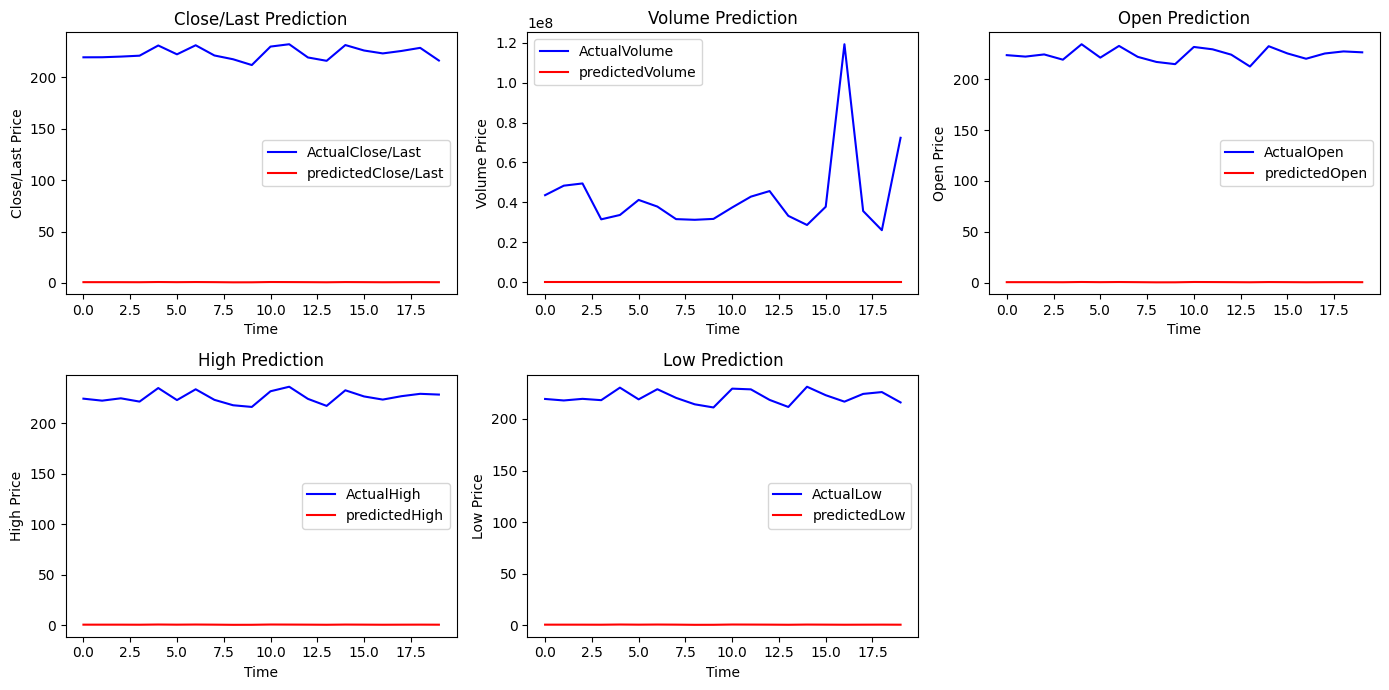

In [ ]:
##3plotting the results

plt.figure(figsize=(14,7))
for i, col in enumerate(dataset_scaled.columns):
  plt.subplot(2,3, i+1)
  plt.plot(y_test_rescaled[:,i], color='blue', label = f'Actual{col}')
  plt.plot(predictions[:, i], color='red', label= f'predicted{col}')
  plt.title(f'{col} Prediction')
  plt.xlabel('Time')
  plt.ylabel(f'{col} Price')
  plt.legend()
  plt.tight_layout()
plt.show()

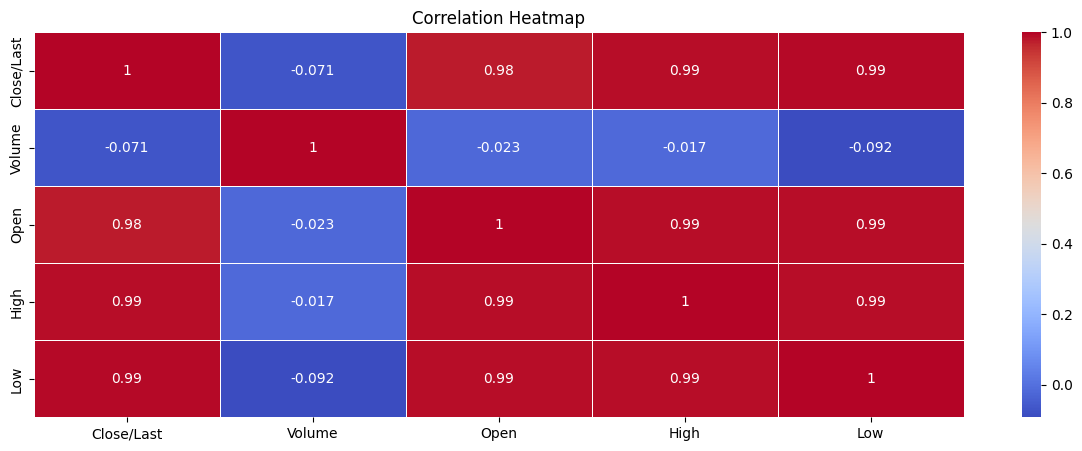

In [ ]:
#  correlation matrix
corr = dataset.corr(numeric_only=True)

#  heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

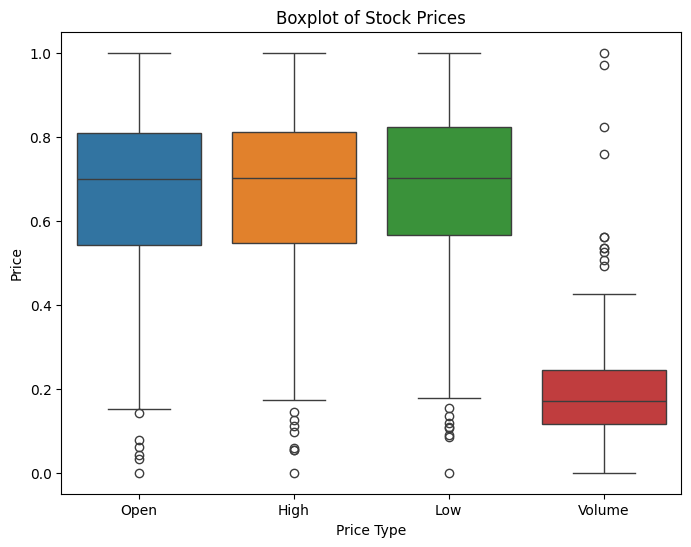

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset[['Open', 'High', 'Low', 'Volume']])
plt.title('Boxplot of Stock Prices')
plt.ylabel('Price')
plt.xlabel('Price Type')
plt.show()

In [ ]:
## Bidirectional LSTM model
model_bilstm = Sequential([
    Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(units=50, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(units=50, return_sequences=False)),
    Dropout(0.3),
    Dense(y_train.shape[1])
])

# Compilation
model_bilstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])

# Early stopping
early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Training
history_bilstm = model_bilstm.fit(x_train, y_train, epochs=100, batch_size=2, validation_split=0.2, callbacks=[early_stopping_bilstm])

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - RootMeanSquaredError: 0.4027 - loss: 0.1723 - val_RootMeanSquaredError: 0.1662 - val_loss: 0.0276
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - RootMeanSquaredError: 0.2080 - loss: 0.0434 - val_RootMeanSquaredError: 0.1413 - val_loss: 0.0200
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - RootMeanSquaredError: 0.2176 - loss: 0.0479 - val_RootMeanSquaredError: 0.1063 - val_loss: 0.0113
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - RootMeanSquaredError: 0.1985 - loss: 0.0397 - val_RootMeanSquaredError: 0.0988 - val_loss: 0.0098
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - RootMeanSquaredError: 0.1679 - loss: 0.0283 - val_RootMeanSquaredError: 0.1052 - val_loss: 0.0111
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - RootMeanSquaredError: 0.1732 - loss: 0.0301 - val_RootMeanSquaredError: 0.1315 - val_loss: 0.0173
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - RootMeanSquaredError: 0.1667 - loss: 0.0279 -

In [ ]:
# Evaluate LSTM model
lstm_evaluation = model.evaluate(x_test, y_test, verbose=0)
lstm_rmse = lstm_evaluation[1]  # Assuming RootMeanSquaredError is the second metric
print(f"LSTM Model RMSE: {lstm_rmse:.4f}")

# Evaluate Bidirectional LSTM model
bilstm_evaluation = model_bilstm.evaluate(x_test, y_test, verbose=0)
bilstm_rmse = bilstm_evaluation[1]  # Assuming RootMeanSquaredError is the second metric
print(f"Bidirectional LSTM Model RMSE: {bilstm_rmse:.4f}")

LSTM Model RMSE: 0.1013
Bidirectional LSTM Model RMSE: 0.1054


In [ ]:
def build_gru():
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(seq_length,1)),
        Dropout(0.2),
        GRU(32),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model